<a href="https://colab.research.google.com/github/Nzaya/Digit-Recognizer/blob/master/Digital_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIGIT RECOGNIZER

In [0]:
#Loading necessary libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

np.random.seed(1212)

import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers

In [20]:
#Load the train dataset

train= pd.read_csv('/content/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
#Load the tes dataset

test= pd.read_csv('/content/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Splitting our train set

features= train.iloc[:, 1:785]
label= train.iloc[:, 0]

In [23]:
# Defining our X_test dataset

X_test= test.iloc[:, 0:784]
print(X_test.shape)

(28000, 784)


In [0]:
# Reshaping our images

from sklearn.model_selection import train_test_split

X_train,X_cv, y_train,y_cv= train_test_split(features, label,test_size= 0.2, random_state=1212)

X_train= X_train.as_matrix().reshape(33600,784)
X_cv= X_cv.as_matrix().reshape(8400,784)

X_test= X_test.as_matrix().reshape(28000, 784)

In [25]:
#Data Cleaning , Normalization and Selection

print((min(X_train[1]), max(X_train[1])))

(0, 255)


As the pixel intensities are currently between the range of 0 and 255, we proceed to normalize the features, using broadcasting. In addition, we proceed to convert our labels from a class vector to binary One Hot Encoded


In [0]:
# Feature Normalization

X_train= X_train.astype('float32'); X_cv= X_cv.astype('float32'); X_test= X_test.astype('float32')
X_train /= 255; X_cv /= 255; X_test /=255


In [0]:
#Convert labels to One Hot Encode

num_digits= 10
y_train= keras.utils.to_categorical(y_train, num_digits)
y_cv= keras.utils.to_categorical(y_cv, num_digits)

In [28]:
# Previewing our labels after conversion

print(y_train[0])
print(y_train[3])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## MODELLING


Model One: SIMPLE NEURAL NETWORK WITH 4 LAYERS (300 ,100,100,200)

In [0]:
#Imput Parameters

n_input= 784
n_hidden_1= 300
n_hidden_2= 100
n_hidden_3= 100
n_hidden_4= 200
num_digits= 10

In [0]:
Inp= Input(shape=(784, ))
x= Dense(n_hidden_1, activation='relu', name= 'Hidden_layer_1')(Inp)
x=Dense(n_hidden_2, activation='relu', name='Hidden_layer_2')(x)
x= Dense(n_hidden_3, activation='relu', name='Hidden_layer_3')(x)
x=Dense(n_hidden_4, activation='relu',name='Hidden_layer_4')(x)
output= Dense(num_digits, activation='softmax', name='Output_layer')(x)

In [31]:
#Our model has 6 layers in Total that is 1 input layer, 4 hidden layer and 1 output layer

model= Model(Inp, output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Hidden_layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Hidden_layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
Hidden_layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_layer_4 (Dense)       (None, 200)               20200     
_________________________________________________________________
Output_layer (Dense)         (None, 10)                2010      
Total params: 297,910
Trainable params: 297,910
Non-trainable params: 0
_____________________________________________________

We have 297,910 parameters to estimate

In [0]:
#Insert Hyperparameters

learning_rate= 0.1
training_epochs= 20
batch_size= 100
sgd= optimizers.SGD(lr= learning_rate)

In [0]:
#We rely on the plain Vanilla Stochastic Gradient Descent as our optimizing methodology

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [37]:
history1= model.fit(X_train, y_train, batch_size=batch_size,
                    epochs= training_epochs,verbose=2, validation_data=(X_cv,y_cv))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33600 samples, validate on 8400 samples
Epoch 1/20





 - 4s - loss: 1.8550 - acc: 0.4996 - val_loss: 1.0033 - val_acc: 0.7594
Epoch 2/20
 - 3s - loss: 0.6475 - acc: 0.8279 - val_loss: 0.4625 - val_acc: 0.8723
Epoch 3/20
 - 3s - loss: 0.4096 - acc: 0.8825 - val_loss: 0.3610 - val_acc: 0.8982
Epoch 4/20
 - 3s - loss: 0.3399 - acc: 0.9007 - val_loss: 0.3279 - val_acc: 0.9026
Epoch 5/20
 - 3s - loss: 0.2988 - acc: 0.9133 - val_loss: 0.2887 - val_acc: 0.9168
Epoch 6/20
 - 3s - loss: 0.2694 - acc: 0.9216 - val_loss: 0.2693 - val_acc: 0.9206
Epoch 7/20
 - 3s - loss: 0.2461 - acc: 0.9280 - val_loss: 0.2468 - val_acc: 0.9292
Epoch 8/20
 - 3s - loss: 0.2268 - acc: 0.9339 - val_loss: 0.2479 - val_acc: 0.9261
Epoch 9/20
 - 3s - loss: 0.2110 - acc: 0.9386 - val_loss: 0.2188 - val_acc: 0.9369
Epoch 10/20
 - 3s - loss: 0.1959 - acc: 0.9428 - val_loss: 0.2032 - val_acc: 0.9408
Epoch 11/20
 - 3s 

Using 4 layer neural network with:
1. 20 training epochs
2.A training batch size of 100
3.Hidden layers set as ( 300, 100, 100, 200)
4. Learning rate of 0.1

Achieved a training score of around 96% and a test score of 95%

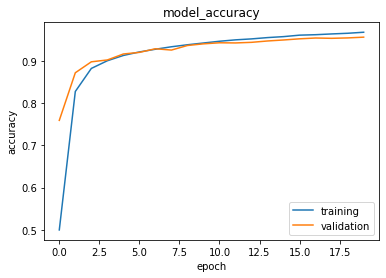

In [56]:
#Plotting our model performance using Softmax

plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

Let's use Adam Optimizer

In [0]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

In [0]:
adam= keras.optimizers.Adam(lr=learning_rate)
model2= Model(Inp,output)

In [0]:
model2.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
history2= model2.fit(X_train, y_train, batch_size=batch_size,
                     epochs= training_epochs, verbose= 2, validation_data=(X_cv,y_cv))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
 - 4s - loss: 0.3399 - acc: 0.8983 - val_loss: 0.1625 - val_acc: 0.9498
Epoch 2/20
 - 3s - loss: 0.1274 - acc: 0.9604 - val_loss: 0.1172 - val_acc: 0.9633
Epoch 3/20
 - 3s - loss: 0.0845 - acc: 0.9733 - val_loss: 0.1059 - val_acc: 0.9668
Epoch 4/20
 - 3s - loss: 0.0631 - acc: 0.9803 - val_loss: 0.1161 - val_acc: 0.9649
Epoch 5/20
 - 3s - loss: 0.0455 - acc: 0.9851 - val_loss: 0.1209 - val_acc: 0.9636
Epoch 6/20
 - 3s - loss: 0.0406 - acc: 0.9862 - val_loss: 0.1160 - val_acc: 0.9688
Epoch 7/20
 - 3s - loss: 0.0303 - acc: 0.9900 - val_loss: 0.1085 - val_acc: 0.9727
Epoch 8/20
 - 3s - loss: 0.0241 - acc: 0.9923 - val_loss: 0.1025 - val_acc: 0.9748
Epoch 9/20
 - 3s - loss: 0.0262 - acc: 0.9913 - val_loss: 0.1070 - val_acc: 0.9738
Epoch 10/20
 - 3s - loss: 0.0195 - acc: 0.9943 - val_loss: 0.1095 - val_acc: 0.9746
Epoch 11/20
 - 3s - loss: 0.0176 - acc: 0.9940 - val_loss: 0.1150 - val_acc: 0.9767
Epoch 12/20
 - 3s - loss: 0.0206 - a

It turns out optimizers play a crucial part in the validation score and in this case Adam is better than Softmax


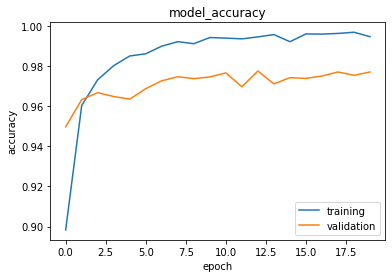

In [57]:
#Plotting model performance using Adam

plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

# Prediction on the Test Set

In [60]:
test_pred= pd.DataFrame(model2.predict(X_test, batch_size=200))
test_pred= pd.DataFrame(test_pred.idxmax(axis=1))
test_pred.index.name='ImageId'
test_pred= test_pred.rename(columns={0: 'Label'}).reset_index()
test_pred['ImageId']= test_pred['ImageId']+ 1
test_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


# CONCLUSION

We have an accuracy of 0.9771